# 출퇴근 교통량 증가에 따른 미세먼지 농도 상승의 상관관계 분석

### 서울특별시의 연도별,시간별 미세먼지 데이터를 활용해 환경오염의 원인을 파악해보기
 * 가설1 자동차 교통량이 많아지는 출퇴근 시간대에 미세먼지 농도가 상승할것이다.
 * 가설2 연도별로 미세먼지 농도는 꾸준히 높아졌을것이다.
 * 가설3 봄에 미세먼지 농도가 가장높을것이다.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False 

In [100]:
df = pd.read_csv('서울시 대기질 자료 제공_2008-2011.csv',encoding='cp949')
df

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2011-12-31 23:00,평균,89.0,61.0
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,69.0
...,...,...,...,...
902525,2008-01-01 1:00,용산구,75.0,18.0
902526,2008-01-01 1:00,은평구,67.0,19.0
902527,2008-01-01 1:00,종로구,56.0,11.0
902528,2008-01-01 1:00,중구,58.0,11.0


In [101]:
df.shape # 90만개에 달하는 행이 있기때문에 사용할 데이터 행을 새로운 데이터프레임으로 선별하는 작업을 해아할듯함.

(902530, 4)

In [102]:
df.info() #  미세먼지(PM10)열과 초미세먼지(PM25)열의 결측치가 보임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902530 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           902530 non-null  object 
 1   구분           902530 non-null  object 
 2   미세먼지(PM10)   879560 non-null  float64
 3   초미세먼지(PM25)  894380 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.5+ MB


In [103]:
df.dropna(inplace=True) # 분석을 할 데이터가 충분히 많다고 판단되어 결측치 삭제 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 875009 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           875009 non-null  object 
 1   구분           875009 non-null  object 
 2   미세먼지(PM10)   875009 non-null  float64
 3   초미세먼지(PM25)  875009 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.4+ MB


In [104]:
## 사람의 활동이 제일 활발한 시간대인 12시를 기준으로 상승폭 막대그래프 

### 연도별로 미세먼지 농도의 상승폭을 확인하기위해 연도별 테이블 생성 
* 08년 부터 22년 까지의 데이터를 가지고있으니 3년주기로 08년 11년 14년 17년 20년 마지막 22년까지에 해당하는 테이블을 생성
  * 각 년도의 월별

In [105]:
df['일시'] = pd.to_datetime(df['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경

In [106]:
df.info() # '일시' 열이 datetime64로 변경됨.

<class 'pandas.core.frame.DataFrame'>
Index: 875009 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   일시           875009 non-null  datetime64[ns]
 1   구분           875009 non-null  object        
 2   미세먼지(PM10)   875009 non-null  float64       
 3   초미세먼지(PM25)  875009 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 33.4+ MB


In [107]:
df2008 = df[df['일시'].dt.year==2008] # 2008년인 행만 추출하여 df2008 데이터프레임 생성
df2008

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
676287,2008-12-31 23:00:00,평균,40.0,16.0
676288,2008-12-31 23:00:00,강남구,38.0,11.0
676289,2008-12-31 23:00:00,강동구,41.0,14.0
676290,2008-12-31 23:00:00,강북구,53.0,12.0
676291,2008-12-31 23:00:00,강서구,40.0,15.0
...,...,...,...,...
902525,2008-01-01 01:00:00,용산구,75.0,18.0
902526,2008-01-01 01:00:00,은평구,67.0,19.0
902527,2008-01-01 01:00:00,종로구,56.0,11.0
902528,2008-01-01 01:00:00,중구,58.0,11.0


In [108]:
df2008.count()

일시             217935
구분             217935
미세먼지(PM10)     217935
초미세먼지(PM25)    217935
dtype: int64

C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\2706770006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2008['연도'] = df2008['일시'].dt.year # '일시'열의 year만 추출해 새로운 열 생성
C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\2706770006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2008['월'] = df2008['일시'].dt.month # '일시'열의 month만 추출해 새로운 열 생성


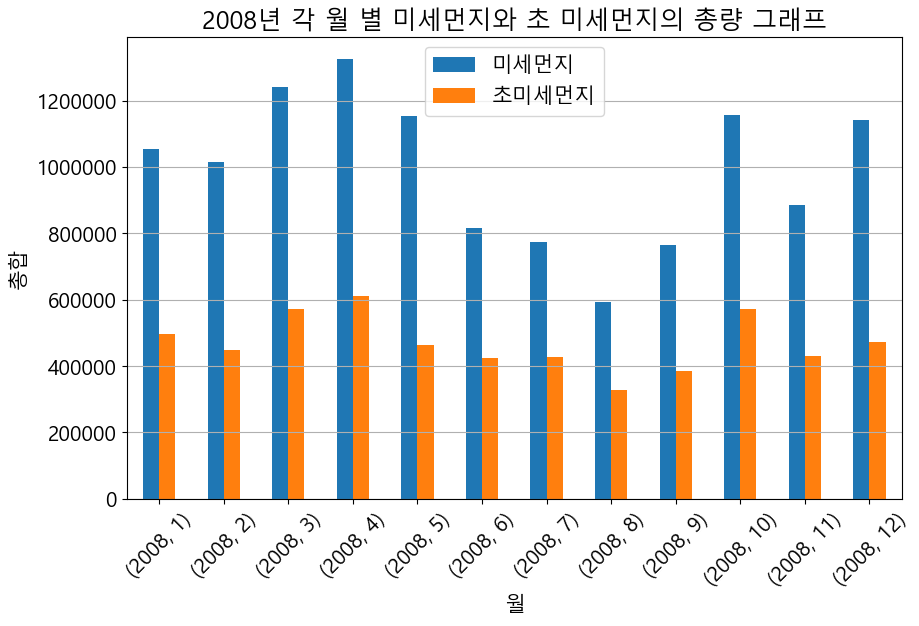

In [109]:
df2008['연도'] = df2008['일시'].dt.year # '일시'열의 year만 추출해 새로운 열 생성
df2008['월'] = df2008['일시'].dt.month # '일시'열의 month만 추출해 새로운 열 생성 
df2008

# 연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2008.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2008년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\2242145070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2011['연도'] = df2011['일시'].dt.year
C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\2242145070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2011['월'] = df2011['일시'].dt.month


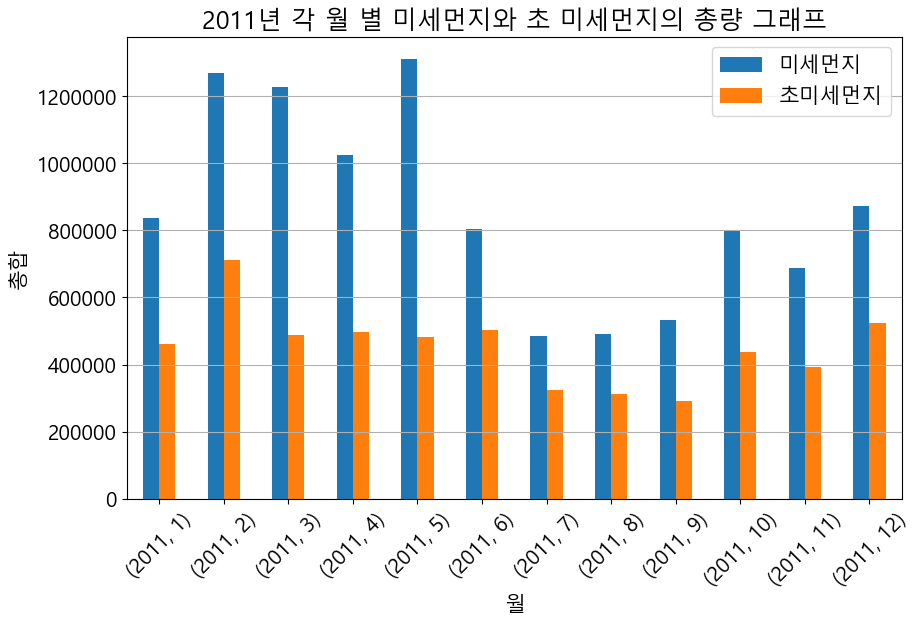

In [125]:

df2011 = df[df['일시'].dt.year==2011] 
df2011
df2011['연도'] = df2011['일시'].dt.year 
df2011['월'] = df2011['일시'].dt.month 
df
# 연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2011.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2011년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [126]:
df2011.count()

일시             219764
구분             219764
미세먼지(PM10)     219764
초미세먼지(PM25)    219764
연도             219764
월              219764
dtype: int64

In [111]:
df2 = pd.read_csv('서울시 대기질 자료 제공_2012-2015.csv',encoding='cp949')
df2

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2015-12-31 23:00,평균,93.0,62.0
1,2015-12-31 23:00,강남구,107.0,70.0
2,2015-12-31 23:00,강동구,91.0,51.0
3,2015-12-31 23:00,강북구,92.0,64.0
4,2015-12-31 23:00,강서구,96.0,51.0
...,...,...,...,...
907336,2012-01-01 0:00,용산구,78.0,42.0
907337,2012-01-01 0:00,은평구,95.0,61.0
907338,2012-01-01 0:00,종로구,76.0,45.0
907339,2012-01-01 0:00,중구,68.0,46.0


In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907341 entries, 0 to 907340
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           907341 non-null  object 
 1   구분           907341 non-null  object 
 2   미세먼지(PM10)   890533 non-null  float64
 3   초미세먼지(PM25)  885874 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.7+ MB


In [113]:
df2.dropna(inplace=True)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 874487 entries, 0 to 907340
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           874487 non-null  object 
 1   구분           874487 non-null  object 
 2   미세먼지(PM10)   874487 non-null  float64
 3   초미세먼지(PM25)  874487 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.4+ MB


In [115]:
df3 = pd.read_csv('서울시 대기질 자료 제공_2016-2019.csv',encoding='cp949')
df3

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2019-12-31 23:00,평균,23.0,15.0
1,2019-12-31 23:00,강남구,19.0,15.0
2,2019-12-31 23:00,강동구,25.0,18.0
3,2019-12-31 23:00,강북구,25.0,16.0
4,2019-12-31 23:00,강서구,29.0,17.0
...,...,...,...,...
911535,2016-01-01 0:00,용산구,70.0,54.0
911536,2016-01-01 0:00,은평구,63.0,34.0
911537,2016-01-01 0:00,종로구,87.0,68.0
911538,2016-01-01 0:00,중구,86.0,48.0


In [116]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911540 entries, 0 to 911539
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           911540 non-null  object 
 1   구분           911540 non-null  object 
 2   미세먼지(PM10)   880427 non-null  float64
 3   초미세먼지(PM25)  883045 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [117]:
df3.dropna(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870970 entries, 0 to 911539
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           870970 non-null  object 
 1   구분           870970 non-null  object 
 2   미세먼지(PM10)   870970 non-null  float64
 3   초미세먼지(PM25)  870970 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.2+ MB


In [118]:
df4 = pd.read_csv('서울시 대기질 자료 제공_2020-2021.csv',encoding='cp949')
df4.info()
df4.dropna(inplace=True)
df4.info()
df4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456142 entries, 0 to 456141
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           456142 non-null  object 
 1   구분           456142 non-null  object 
 2   미세먼지(PM10)   446550 non-null  float64
 3   초미세먼지(PM25)  448831 non-null  float64
dtypes: float64(2), object(2)
memory usage: 13.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 444383 entries, 0 to 456141
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           444383 non-null  object 
 1   구분           444383 non-null  object 
 2   미세먼지(PM10)   444383 non-null  float64
 3   초미세먼지(PM25)  444383 non-null  float64
dtypes: float64(2), object(2)
memory usage: 17.0+ MB


,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2021-12-31 23:00,평균,21.0,9.0
1,2021-12-31 23:00,강남구,21.0,9.0
2,2021-12-31 23:00,강동구,25.0,7.0
3,2021-12-31 23:00,강북구,23.0,12.0
4,2021-12-31 23:00,강서구,28.0,9.0
...,...,...,...,...
456137,2020-01-01 0:00,용산구,12.0,13.0
456138,2020-01-01 0:00,은평구,18.0,12.0
456139,2020-01-01 0:00,종로구,20.0,15.0
456140,2020-01-01 0:00,중구,22.0,18.0


In [119]:
df5 = pd.read_csv('서울시 대기질 자료 제공_2022.csv',encoding='cp949')
df5.info()
df5.dropna(inplace=True)
df5.info()
df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227760 entries, 0 to 227759
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            227760 non-null  object 
 1   구분            227760 non-null  object 
 2   미세먼지(PM10)    222844 non-null  float64
 3   초미세먼지(PM2.5)  223513 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 221737 entries, 0 to 227759
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            221737 non-null  object 
 1   구분            221737 non-null  object 
 2   미세먼지(PM10)    221737 non-null  float64
 3   초미세먼지(PM2.5)  221737 non-null  float64
dtypes: float64(2), object(2)
memory usage: 8.5+ MB


,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2022-12-31 23:00,평균,59.0,46.0
1,2022-12-31 23:00,강남구,57.0,44.0
2,2022-12-31 23:00,강동구,68.0,55.0
3,2022-12-31 23:00,강북구,59.0,42.0
4,2022-12-31 23:00,강서구,62.0,40.0
...,...,...,...,...
227755,2022-01-01 0:00,용산구,22.0,11.0
227756,2022-01-01 0:00,은평구,19.0,9.0
227757,2022-01-01 0:00,종로구,20.0,9.0
227758,2022-01-01 0:00,중구,20.0,11.0


C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\798505635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['연도'] = df2014['일시'].dt.year
C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\798505635.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['월'] = df2014['일시'].dt.month


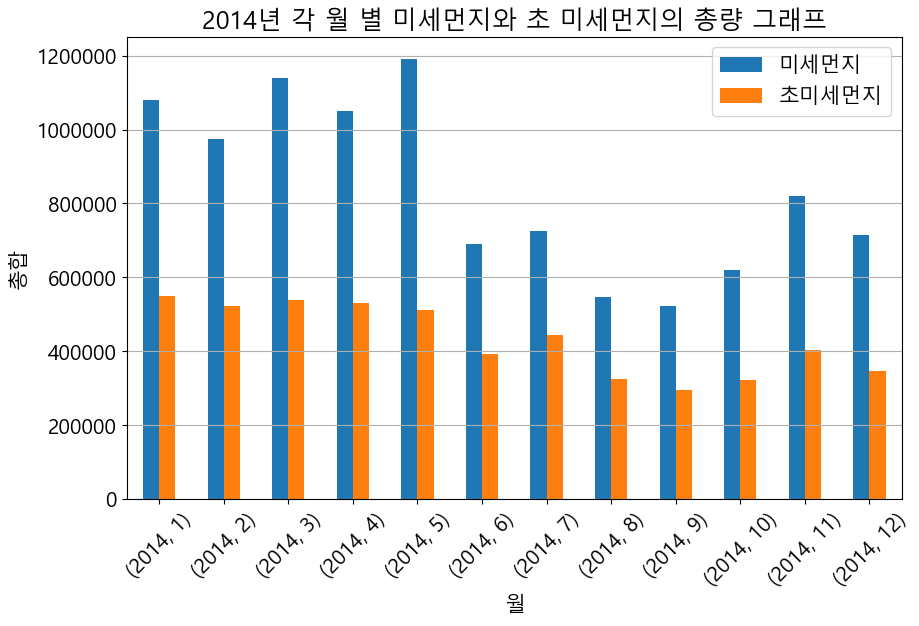

In [120]:
df2['일시'] = pd.to_datetime(df2['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df3['일시'] = pd.to_datetime(df3['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df4['일시'] = pd.to_datetime(df4['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df5['일시'] = pd.to_datetime(df5['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경




df2014 = df2[df2['일시'].dt.year==2014] 
df2014
df2014['연도'] = df2014['일시'].dt.year 
df2014['월'] = df2014['일시'].dt.month 
df2014
# 연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2014.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2014년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\2857370652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['연도'] = df2017['일시'].dt.year
C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\2857370652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['월'] = df2017['일시'].dt.month


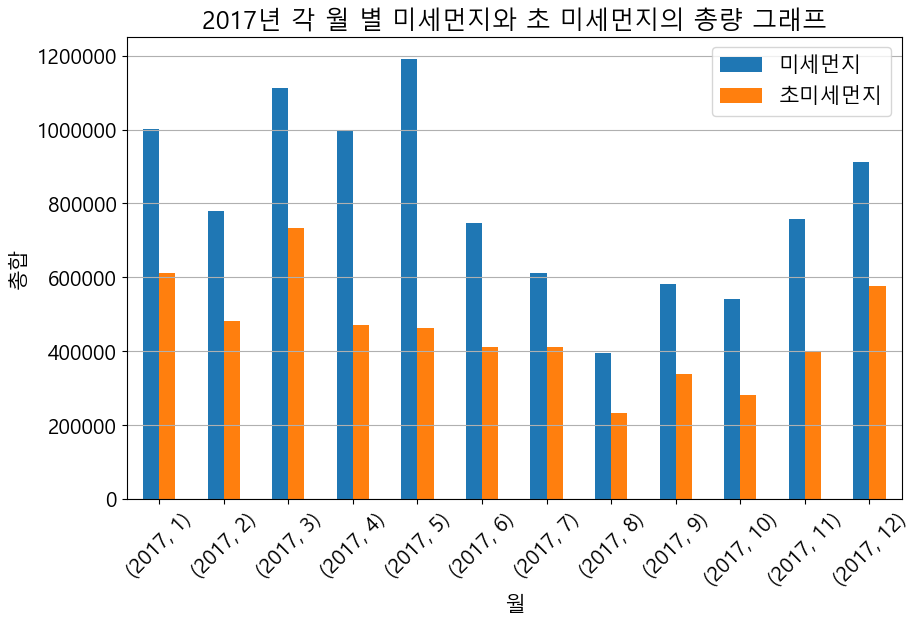

In [121]:
df2017 = df3[df3['일시'].dt.year==2017] 
df2017['연도'] = df2017['일시'].dt.year 
df2017['월'] = df2017['일시'].dt.month 
# 연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2017.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2017년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()



C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\482687646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['연도'] = df2020['일시'].dt.year
C:\Users\gusql\AppData\Local\Temp\ipykernel_33912\482687646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['월'] = df2020['일시'].dt.month


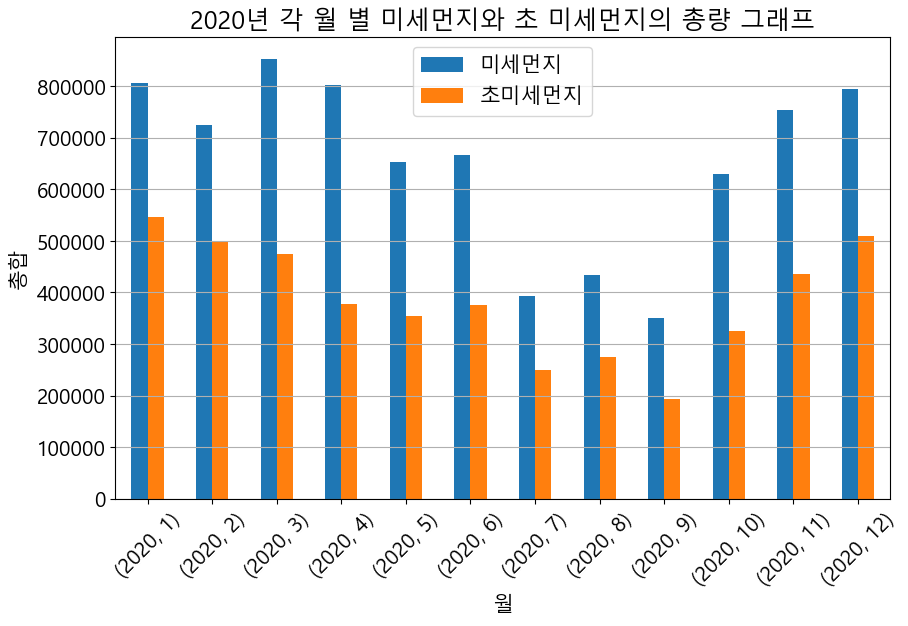

In [122]:
df2020 = df4[df4['일시'].dt.year==2020] 
df2020['연도'] = df2020['일시'].dt.year 
df2020['월'] = df2020['일시'].dt.month 
# 연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2020.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2020년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

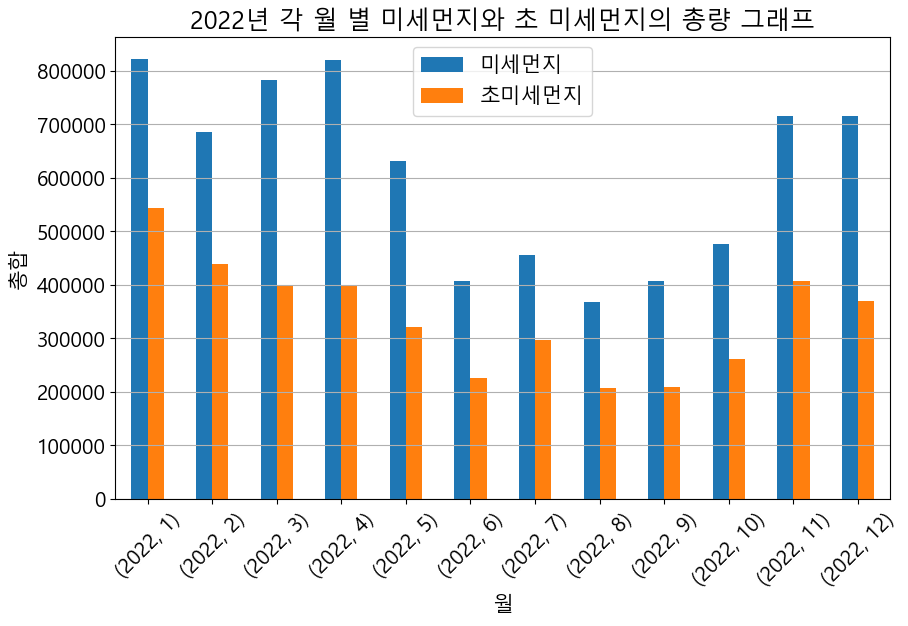

In [123]:
df2022 = df5[df5['일시'].dt.year==2022] 
df2022
df2022['연도'] = df2022['일시'].dt.year 
df2022['월'] = df2022['일시'].dt.month
df2022
# 연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2022.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM2.5)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2022년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [128]:
df2022.count()

일시              221737
구분              221737
미세먼지(PM10)      221737
초미세먼지(PM2.5)    221737
연도              221737
월               221737
dtype: int64

In [ ]:
연도별로 미세먼지의 총량이 당연히 상승했을거라 생각했지만 
놀랍게도 최근의 총량이 더 적어진것을발견
측정상의 오류가 있나 싶어 .count()함수를 써서 각 연도별 개수를 확인해봤더니 
데이터의 개수는 균일